In [1]:
import torch
import matplotlib
import seaborn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
torch.__version__

'1.13.0+cpu'

In [3]:
size_weight_data = pd.read_csv("datasets/headbrain.csv")
size_weight_data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [4]:
size_weight_data.shape

(237, 4)

In [5]:
size_weight_data.drop(['Gender', 'Age Range'], axis=1, inplace=True)
size_weight_data.columns

Index(['Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [6]:
size_weight_data = size_weight_data.rename(columns={'Head Size(cm^3)':'Head Size', 'Brain Weight(grams)':'Brain Weight'})

In [7]:
size_weight_data.head()

,Head Size,Brain Weight
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


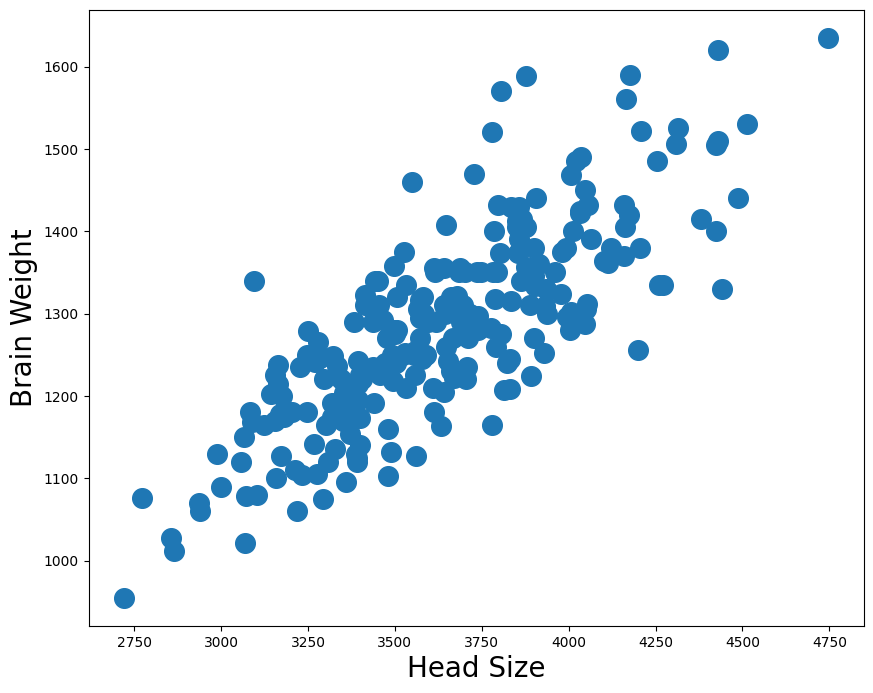

In [8]:
plt.figure(figsize=(10, 8))

plt.scatter(size_weight_data['Head Size'], size_weight_data['Brain Weight'], s=200)

plt.xlabel('Head Size', fontsize=20)
plt.ylabel('Brain Weight', fontsize=20)

plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(size_weight_data[['Head Size']], size_weight_data[['Brain Weight']], test_size=0.2, random_state=1)

In [10]:
x_train.shape, y_train.shape

((189, 1), (189, 1))

In [11]:
x_train.describe()

,Head Size
count,189.000000
mean,3622.841270
std,361.195262
min,2720.000000
25%,3381.000000
50%,3609.000000
75%,3858.000000
max,4747.000000


In [12]:
standardScaler_x = StandardScaler()

standardScaler_x.fit(x_train)

StandardScaler()

In [13]:
x_train = pd.DataFrame(standardScaler_x.transform(x_train))
x_train.describe()

,0
count,1.890000e+02
mean,-1.057355e-16
std,1.002656e+00
min,-2.506232e+00
25%,-6.713366e-01
50%,-3.842252e-02
75%,6.527863e-01
max,3.120596e+00


In [14]:
x_test = pd.DataFrame(standardScaler_x.transform(x_test))
x_test.describe()

,0
count,48.000000
mean,0.152828
std,1.059236
min,-2.106497
25%,-0.637331
50%,0.151729
75%,0.774234
max,2.273935


In [15]:
standardScaler_y = StandardScaler()
standardScaler_y.fit(y_train)

StandardScaler()

In [16]:
y_train = pd.DataFrame(standardScaler_y.transform(y_train))
y_train.describe()

,0
count,1.890000e+02
mean,7.847926e-16
std,1.002656e+00
min,-2.720822e+00
25%,-6.348438e-01
50%,-9.050276e-03
75%,5.750236e-01
max,2.953039e+00


In [17]:
y_test = pd.DataFrame(standardScaler_y.transform(y_test))
y_test.describe()

,0
count,48.000000
mean,0.073694
std,1.018302
min,-2.245219
25%,-0.568092
50%,-0.009050
75%,0.825341
max,2.577563


In [18]:
x_train_tensor = torch.tensor(x_train.values.reshape(-1, 1), dtype = torch.float)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype = torch.float)

x_test_tensor = torch.tensor(x_test.values.reshape(-1, 1), dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype = torch.float)

In [19]:
input_layer = 1
hidden_layer = 12
output_layer = 1

In [20]:
loss_func = torch.nn.MSELoss(reduction='sum')

In [21]:
model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer), torch.nn.ReLU(), torch.nn.Linear(hidden_layer, output_layer))

In [22]:
learning_rate = 1e-4

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for i in range(2000):
    y_pred = model(x_train_tensor)
    loss = loss_func(y_pred, y_train_tensor)
    print('Iteration no: %s and Loss: %s' %(i, loss.item()))

    model.zero_grad()
    loss.backward()

    optimizer.step()

Iteration no: 0 and Loss: 189.1446990966797
Iteration no: 1 and Loss: 189.01296997070312
Iteration no: 2 and Loss: 188.88133239746094
Iteration no: 3 and Loss: 188.74978637695312
Iteration no: 4 and Loss: 188.6183624267578
Iteration no: 5 and Loss: 188.48704528808594
Iteration no: 6 and Loss: 188.35580444335938
Iteration no: 7 and Loss: 188.2246856689453
Iteration no: 8 and Loss: 188.09365844726562
Iteration no: 9 and Loss: 187.9627685546875
Iteration no: 10 and Loss: 187.83197021484375
Iteration no: 11 and Loss: 187.70126342773438
Iteration no: 12 and Loss: 187.5706787109375
Iteration no: 13 and Loss: 187.44020080566406
Iteration no: 14 and Loss: 187.30984497070312
Iteration no: 15 and Loss: 187.17959594726562
Iteration no: 16 and Loss: 187.0494384765625
Iteration no: 17 and Loss: 186.91946411132812
Iteration no: 18 and Loss: 186.7895965576172
Iteration no: 19 and Loss: 186.65982055664062
Iteration no: 20 and Loss: 186.53016662597656
Iteration no: 21 and Loss: 186.400634765625
Iterati

In [23]:
model.eval()

with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

y_pred_tensor[:10]

tensor([[-0.7316],
        [-0.0593],
        [-0.3666],
        [ 0.2682],
        [-0.2475],
        [ 1.0964],
        [ 0.5867],
        [ 0.8374],
        [-0.1731],
        [-0.7080]])

In [24]:
y_pred = y_pred_tensor.detach().numpy()

y_pred[:10]

array([[-0.7316065 ],
       [-0.05934774],
       [-0.3666224 ],
       [ 0.26823133],
       [-0.2474897 ],
       [ 1.0964134 ],
       [ 0.586711  ],
       [ 0.83739   ],
       [-0.17310801],
       [-0.7079744 ]], dtype=float32)

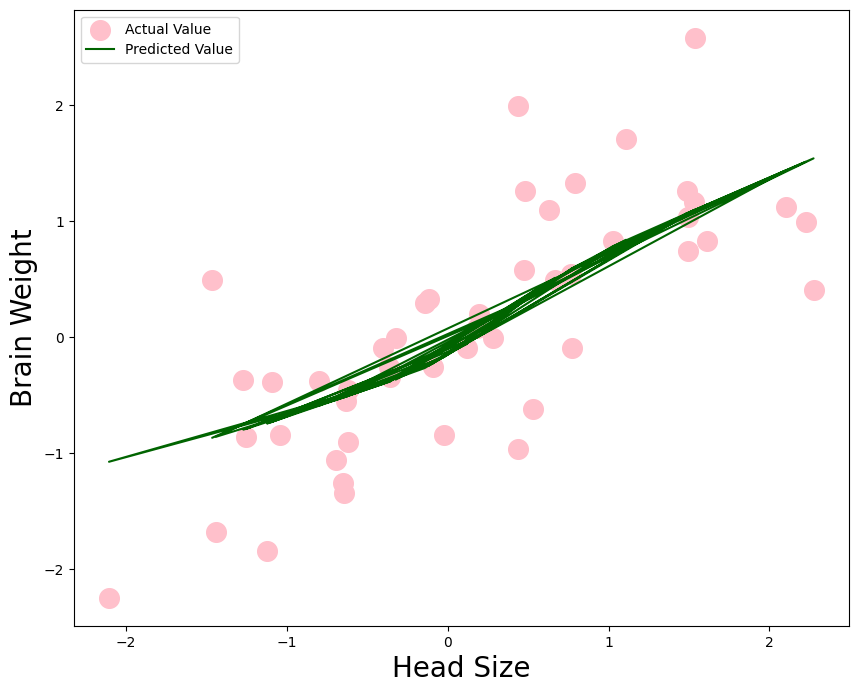

In [25]:
plt.figure(figsize=(10, 8))

plt.scatter(x_test, y_test, s=200, c='pink', label = 'Actual Value')
plt.plot(x_test, y_pred, label='Predicted Value', c='darkgreen')

plt.xlabel('Head Size', fontsize=20)
plt.ylabel('Brain Weight', fontsize=20)

plt.legend()
plt.show()


In [26]:
r2_score(y_test, y_pred)

0.5656938868536198